<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

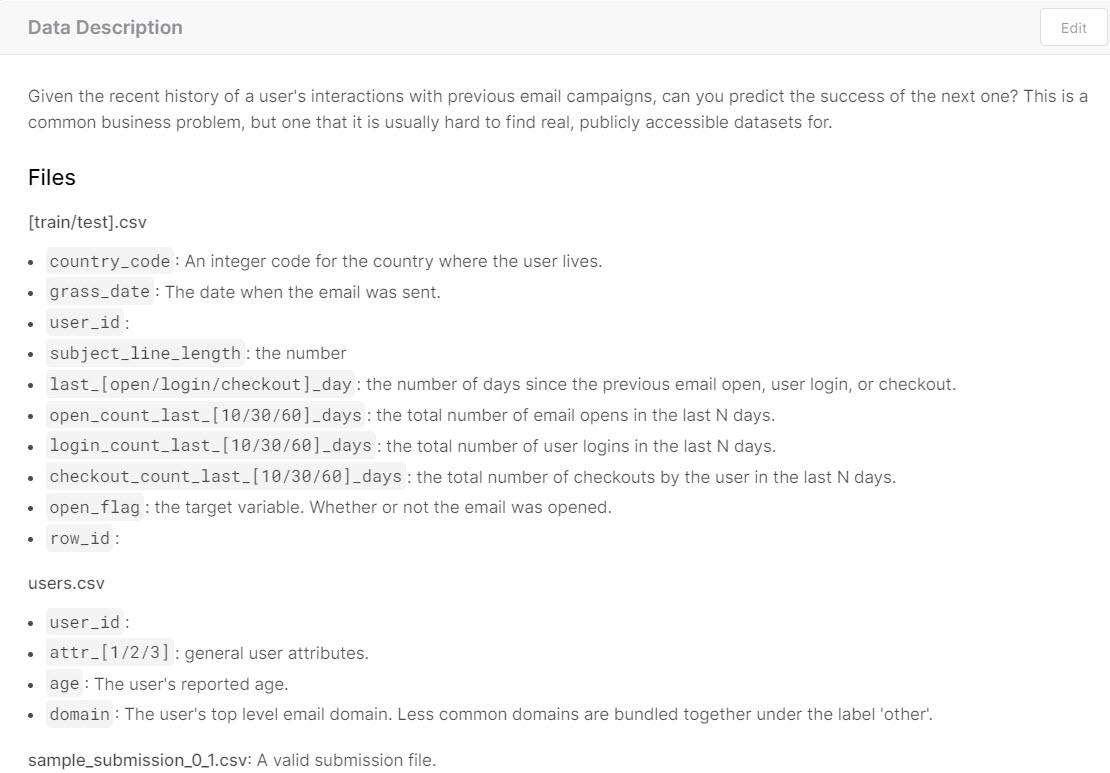

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

# PCA  & LDA Analysis

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

## Define Functions

In [2]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

## Reading in the dataset

Reading User data

In [3]:
#Read the csv file 
dataset3_df = pd.read_csv('data/dataset3.csv')

In [4]:
dataset3_df

,attr_1,attr_2,attr_3,age,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,0,1,0,31,35,85,9,2000,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,1,2,33,64,59,1,3,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,36,50,40,9,253,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,43,35,2,1,2,1,3,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,31,40,29,3,6,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124161,0,1,0,31,49,2,21,2000,1,4,...,0,0,0,1,0,0,0,0,0,0
124162,0,1,0,31,41,22,3,27,0,2,...,0,0,0,0,1,0,0,0,0,0
124163,0,1,0,31,38,20,5,2000,0,3,...,0,0,0,0,0,1,0,0,0,0
124164,0,0,0,31,47,1000,7,2000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
dataset3_df.shape

(124166, 37)

In [6]:
dataset3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124166 entries, 0 to 124165
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   attr_1                       124166 non-null  int64
 1   attr_2                       124166 non-null  int64
 2   attr_3                       124166 non-null  int64
 3   age                          124166 non-null  int64
 4   subject_line_length          124166 non-null  int64
 5   last_open_day                124166 non-null  int64
 6   last_login_day               124166 non-null  int64
 7   last_checkout_day            124166 non-null  int64
 8   open_count_last_10_days      124166 non-null  int64
 9   open_count_last_30_days      124166 non-null  int64
 10  open_count_last_60_days      124166 non-null  int64
 11  login_count_last_10_days     124166 non-null  int64
 12  login_count_last_30_days     124166 non-null  int64
 13  login_count_last_60_days     

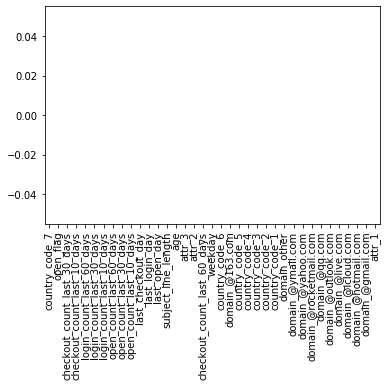

In [7]:
dataset3_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

### Train-test split dataset

reading trainng data

In [8]:
X = dataset3_df.drop(['open_flag'], axis=1)
y = dataset3_df['open_flag']

In [9]:
X.shape

(124166, 36)

In [10]:
y.shape

(124166,)

In [11]:
features = list(X)
features

['attr_1',
 'attr_2',
 'attr_3',
 'age',
 'subject_line_length',
 'last_open_day',
 'last_login_day',
 'last_checkout_day',
 'open_count_last_10_days',
 'open_count_last_30_days',
 'open_count_last_60_days',
 'login_count_last_10_days',
 'login_count_last_30_days',
 'login_count_last_60_days',
 'checkout_count_last_10_days',
 'checkout_count_last_30_days',
 'checkout_count_last_60_days',
 'weekday',
 'domain_@163.com',
 'domain_@gmail.com',
 'domain_@hotmail.com',
 'domain_@icloud.com',
 'domain_@live.com',
 'domain_@outlook.com',
 'domain_@qq.com',
 'domain_@rocketmail.com',
 'domain_@yahoo.com',
 'domain_@ymail.com',
 'domain_other',
 'country_code_1',
 'country_code_2',
 'country_code_3',
 'country_code_4',
 'country_code_5',
 'country_code_6',
 'country_code_7']

In [12]:
len(features)

36

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [14]:
X_train.shape

(100574, 36)

In [15]:
X_train.columns

Index(['attr_1', 'attr_2', 'attr_3', 'age', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'weekday', 'domain_@163.com',
       'domain_@gmail.com', 'domain_@hotmail.com', 'domain_@icloud.com',
       'domain_@live.com', 'domain_@outlook.com', 'domain_@qq.com',
       'domain_@rocketmail.com', 'domain_@yahoo.com', 'domain_@ymail.com',
       'domain_other', 'country_code_1', 'country_code_2', 'country_code_3',
       'country_code_4', 'country_code_5', 'country_code_6', 'country_code_7'],
      dtype='object')

In [16]:
X_val.shape

(11175, 36)

In [17]:
X_test.shape

(12417, 36)

#### Check for Co-relation

In [18]:
# correlation matrix (before stdze)
corr = X_train.corr()
print('Corelation Matrix:\n',X_train.corr())

Corelation Matrix:
                                attr_1    attr_2    attr_3       age  \
attr_1                       1.000000 -0.022805  0.819049  0.076547   
attr_2                      -0.022805  1.000000 -0.031541 -0.019736   
attr_3                       0.819049 -0.031541  1.000000  0.044895   
age                          0.076547 -0.019736  0.044895  1.000000   
subject_line_length          0.011361 -0.027670  0.005171 -0.046592   
last_open_day               -0.066268 -0.249823 -0.044867 -0.051847   
last_login_day              -0.016810 -0.788356 -0.004463 -0.001187   
last_checkout_day           -0.413353  0.024746 -0.339664 -0.035024   
open_count_last_10_days      0.023039  0.051779  0.000237  0.059981   
open_count_last_30_days      0.022198  0.056946 -0.000208  0.073148   
open_count_last_60_days      0.029036  0.055923  0.006539  0.075182   
login_count_last_10_days     0.242330 -0.003309  0.221952  0.057180   
login_count_last_30_days     0.255507 -0.003999  0.234190

In [19]:
corr.to_csv('data/X_train_correlation_dataset3.csv')

### Apply standardscalar 

In [20]:
X_train.shape

(100574, 36)

In [21]:
scaler = StandardScaler().fit(X_train)

X_train_col_names = X_train.columns
y_train_col_names = y_train.to_frame().columns
X_val_col_names   = X_val.columns
y_val_col_names   = y_val.to_frame().columns
X_test_col_names  = X_test.columns
y_test_col_names  = y_test.to_frame().columns

X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform (X_val)
X_test_scaled  = scaler.transform (X_test)

#X_train_scaled = pd.DataFrame(X_train_scaled)
#X_val_scaled = pd.DataFrame(X_val_scaled)
#X_test_scaled = pd.DataFrame(X_test_scaled)

from sklearn.externals import joblib
scaler_filename = "dataset3_scaler.save"
joblib.dump(scaler, scaler_filename) 

['dataset3_scaler.save']

In [22]:
X_train_scaled

array([[-1.26545078,  0.08662061, -1.03719824, ..., -0.30975383,
        -0.23250381, -0.20028936],
       [ 0.79023224,  0.08662061, -0.06174307, ..., -0.30975383,
        -0.23250381, -0.20028936],
       [ 0.79023224,  0.08662061,  0.91371209, ..., -0.30975383,
        -0.23250381, -0.20028936],
       ...,
       [-1.26545078,  0.08662061, -1.03719824, ...,  3.22837012,
        -0.23250381, -0.20028936],
       [-1.26545078,  0.08662061, -1.03719824, ..., -0.30975383,
         4.30100487, -0.20028936],
       [ 0.79023224,  0.08662061, -0.06174307, ..., -0.30975383,
        -0.23250381, -0.20028936]])

In [23]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_val_scaled_df = pd.DataFrame(X_val_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [24]:
X_train_scaled_df.columns = X_train_col_names
X_val_scaled_df.columns = X_train_col_names 
X_test_scaled_df.columns = X_train_col_names

X_val_scaled_df.head()

,attr_1,attr_2,attr_3,age,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,-1.265451,0.086621,-1.037198,-0.096900,-1.168033,-0.317467,-0.044573,1.864512,-0.725871,-0.154000,...,-0.28309,-0.054146,-0.153324,-0.67513,1.966797,-0.461336,-0.38418,-0.309754,-0.232504,-0.200289
1,-1.265451,0.086621,-1.037198,-0.096900,-0.628901,0.779377,-0.086151,1.864512,-0.725871,-0.786914,...,-0.28309,-0.054146,-0.153324,-0.67513,1.966797,-0.461336,-0.38418,-0.309754,-0.232504,-0.200289
2,-1.265451,0.086621,-1.037198,-0.096900,0.808784,0.064537,0.126591,1.864512,-0.725871,-0.786914,...,-0.28309,-0.054146,-0.153324,-0.67513,-0.508441,2.167618,-0.38418,-0.309754,-0.232504,-0.200289
3,0.790232,0.086621,1.889167,-0.196221,-1.797021,-0.362854,-0.102782,-0.610418,-0.315830,-0.628685,...,-0.28309,-0.054146,-0.153324,-0.67513,-0.508441,-0.461336,-0.38418,3.228370,-0.232504,-0.200289
4,-1.265451,0.086621,-1.037198,-0.096900,-0.089770,-0.272080,-0.073678,1.864512,-0.725871,-0.786914,...,-0.28309,-0.054146,-0.153324,-0.67513,-0.508441,-0.461336,-0.38418,-0.309754,4.301005,-0.200289


In [25]:
#*******************************************************************************
#                         Save train scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_train_scaled_dataset3.xlsx', engine='xlsxwriter')

X_train_scaled_df.to_excel(writer, sheet_name='X_train_scaled', index = False)
y_train.to_excel(writer, sheet_name='y_train', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [26]:
#*******************************************************************************
#                         Save val scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_val_scaled_dataset3.xlsx', engine='xlsxwriter')

X_val_scaled_df.to_excel(writer, sheet_name='X_val_scaled', index = False)
y_val.to_excel(writer, sheet_name='y_val', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [27]:
#*******************************************************************************
#                         Save test scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_test_scaled_dataset3.xlsx', engine='xlsxwriter')

X_test_scaled_df.to_excel(writer, sheet_name='X_test_scaled', index = False)
y_test.to_excel(writer, sheet_name='y_test', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Applying LDA

In [28]:
# Create and run an LDA
lda = LDA(n_components=None)
X_lda = lda.fit(X_train_scaled, y_train)

In [29]:
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([1.])

In [30]:
# Run function
select_n_components(lda_var_ratios, 0.95)

1

In [31]:
#  Applying LDA
lda = LDA(n_components=4)
X_train_PDA = lda.fit(X_train_scaled, y_train)

In [32]:
# Show the result of LDA
print("Model Priors:\n",lda.priors_)

Model Priors:
 [0.50015909 0.49984091]


In [33]:
# Get the loadings
scalings = pd.DataFrame(lda.scalings_)
scalings.insert(0,'features',features[0:len(features)])
print("LDA Loadings:\n",scalings)

LDA Loadings:
                        features         0
0                        attr_1  0.068117
1                        attr_2  0.015966
2                        attr_3 -0.086640
3                           age  0.022401
4           subject_line_length -0.031444
5                 last_open_day -0.088397
6                last_login_day  0.060843
7             last_checkout_day  0.023887
8       open_count_last_10_days  0.647316
9       open_count_last_30_days  0.285815
10      open_count_last_60_days  0.187361
11     login_count_last_10_days  0.140651
12     login_count_last_30_days -0.035481
13     login_count_last_60_days -0.138599
14  checkout_count_last_10_days -0.011771
15  checkout_count_last_30_days  0.052641
16  checkout_count_last_60_days -0.034882
17                      weekday -0.078865
18              domain_@163.com -0.002656
19            domain_@gmail.com -0.011604
20          domain_@hotmail.com -0.021049
21           domain_@icloud.com  0.014698
22             doma

In [34]:
# Saving the LDA Loadings into excel file

# Create a new excel workbook
writer = pd.ExcelWriter('data/LDA_Loadings_dataset3.xlsx', engine='xlsxwriter')

scalings.to_excel(writer, sheet_name='LDA Loadings', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [35]:
# Get the Eigenvectors
coeff= pd.DataFrame(np.transpose(lda.coef_))
coeff.insert(0,'features',features[0:len(features)])
print("\nLDA Coefficients:\n",coeff)


LDA Coefficients:
                        features         0
0                        attr_1  0.099839
1                        attr_2  0.023402
2                        attr_3 -0.126989
3                           age  0.032833
4           subject_line_length -0.046088
5                 last_open_day -0.129564
6                last_login_day  0.089178
7             last_checkout_day  0.035012
8       open_count_last_10_days  0.948774
9       open_count_last_30_days  0.418920
10      open_count_last_60_days  0.274615
11     login_count_last_10_days  0.206152
12     login_count_last_30_days -0.052004
13     login_count_last_60_days -0.203145
14  checkout_count_last_10_days -0.017252
15  checkout_count_last_30_days  0.077156
16  checkout_count_last_60_days -0.051127
17                      weekday -0.115593
18              domain_@163.com -0.003892
19            domain_@gmail.com -0.017008
20          domain_@hotmail.com -0.030852
21           domain_@icloud.com  0.021542
22            

In [36]:
# Apply LDA on the Testset
from sklearn.metrics import confusion_matrix, classification_report, precision_score

pred=lda.predict(X_test)
print(np.unique(pred, return_counts=True))
print("\nConfusion Matrix:\n", confusion_matrix(pred, y_test))
print('\n')
print(classification_report(y_test, pred, digits=3))

(array([0, 1], dtype=int64), array([6378, 6039], dtype=int64))

Confusion Matrix:
 [[3944 2434]
 [2283 3756]]


              precision    recall  f1-score   support

           0      0.618     0.633     0.626      6227
           1      0.622     0.607     0.614      6190

    accuracy                          0.620     12417
   macro avg      0.620     0.620     0.620     12417
weighted avg      0.620     0.620     0.620     12417



### Applying PCA

In [37]:
colnames = np.transpose(features)
n_components = len(features)
pca = PCA(n_components).fit(X_train_scaled)
X_train_PCA = pca.transform(X_train_scaled)

In [38]:
pca_data_org = pd.DataFrame(X_train_PCA)
pca_data_org

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.419426,1.978805,1.544838,2.298553,-0.780029,-2.562923,-4.045846,1.369528,4.222376,2.382832,...,0.052576,0.184939,0.548678,0.796251,-0.109698,0.055484,-0.057606,0.167088,-2.719739e-15,3.877955e-15
1,0.433210,-0.633050,-1.031646,-0.521679,-0.118958,-0.645402,0.268791,-0.023684,0.109290,-0.871234,...,-0.635822,0.040201,-0.269687,0.489405,-0.493326,-0.055344,0.298676,-0.045213,5.581892e-17,-3.131365e-16
2,0.149922,-0.380159,-1.260361,-0.649729,0.508119,-0.432198,-0.358014,0.122196,-1.175458,2.218874,...,0.011003,-0.139785,-0.228220,-0.010355,0.058339,0.007815,-0.287594,0.078100,-5.548037e-16,6.721864e-16
3,-0.191863,-1.602790,-0.810708,-0.479606,-0.488769,-0.186957,0.440905,-0.118099,0.234182,-0.913178,...,0.301612,0.072120,-0.462614,0.251756,-0.134814,-0.146103,0.019343,-0.032504,-5.520338e-17,-9.109192e-17
4,-1.989692,2.250898,-0.827091,1.039127,1.621756,0.469019,-0.682330,0.004629,-1.152415,0.962959,...,0.089038,0.031117,0.389528,0.316455,-0.046155,-0.021452,-0.284713,0.034337,-2.217368e-16,5.611641e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100569,7.255378,-1.610903,-0.933137,-2.015189,-0.974266,-3.524213,-4.712217,0.570480,1.568981,2.952307,...,-0.092054,-0.090705,0.138460,0.086108,0.634096,0.079374,0.041723,0.032397,-1.276449e-15,-5.074256e-16
100570,1.694343,0.585383,-0.607016,-0.546834,-0.167553,1.236480,0.082488,0.049554,1.665021,0.060932,...,-0.417507,0.062925,0.457963,0.302532,-0.006011,-0.118228,0.054280,-0.011349,3.888858e-16,4.768595e-17
100571,-0.523049,-1.146753,0.435197,0.669655,-1.316675,3.368022,-2.396215,1.072925,-0.456638,-1.459854,...,-0.299798,0.033518,0.123912,-0.144406,-0.121558,-0.264622,0.030851,0.004064,5.554193e-16,2.003416e-16
100572,-1.758956,-0.109262,0.368261,1.106828,-0.416538,0.462465,-0.508890,-1.035707,-0.929618,-1.513880,...,-0.052553,-0.028892,-0.121224,-0.381195,0.048852,-0.015278,0.009563,-0.031532,5.692971e-16,1.517694e-16


In [39]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))
    
# Get Eigenvectors & Eigenvalues
eigvec = pca.components_.transpose()
eigval = pca.explained_variance_
pca_eigenVal_var = pd.DataFrame(eigval,index=PCs)
pca_eigenVal_var

,0
PC1,4.416622e+00
PC2,3.081939e+00
PC3,2.188567e+00
PC4,1.952855e+00
PC5,1.861500e+00
PC6,1.626991e+00
PC7,1.523071e+00
PC8,1.403852e+00
PC9,1.281185e+00
PC10,1.183166e+00


In [40]:
X_train_PCA = pd.DataFrame(X_train_PCA,columns=PCs)
X_train_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,-0.419426,1.978805,1.544838,2.298553,-0.780029,-2.562923,-4.045846,1.369528,4.222376,2.382832,...,0.052576,0.184939,0.548678,0.796251,-0.109698,0.055484,-0.057606,0.167088,-2.719739e-15,3.877955e-15
1,0.433210,-0.633050,-1.031646,-0.521679,-0.118958,-0.645402,0.268791,-0.023684,0.109290,-0.871234,...,-0.635822,0.040201,-0.269687,0.489405,-0.493326,-0.055344,0.298676,-0.045213,5.581892e-17,-3.131365e-16
2,0.149922,-0.380159,-1.260361,-0.649729,0.508119,-0.432198,-0.358014,0.122196,-1.175458,2.218874,...,0.011003,-0.139785,-0.228220,-0.010355,0.058339,0.007815,-0.287594,0.078100,-5.548037e-16,6.721864e-16
3,-0.191863,-1.602790,-0.810708,-0.479606,-0.488769,-0.186957,0.440905,-0.118099,0.234182,-0.913178,...,0.301612,0.072120,-0.462614,0.251756,-0.134814,-0.146103,0.019343,-0.032504,-5.520338e-17,-9.109192e-17
4,-1.989692,2.250898,-0.827091,1.039127,1.621756,0.469019,-0.682330,0.004629,-1.152415,0.962959,...,0.089038,0.031117,0.389528,0.316455,-0.046155,-0.021452,-0.284713,0.034337,-2.217368e-16,5.611641e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100569,7.255378,-1.610903,-0.933137,-2.015189,-0.974266,-3.524213,-4.712217,0.570480,1.568981,2.952307,...,-0.092054,-0.090705,0.138460,0.086108,0.634096,0.079374,0.041723,0.032397,-1.276449e-15,-5.074256e-16
100570,1.694343,0.585383,-0.607016,-0.546834,-0.167553,1.236480,0.082488,0.049554,1.665021,0.060932,...,-0.417507,0.062925,0.457963,0.302532,-0.006011,-0.118228,0.054280,-0.011349,3.888858e-16,4.768595e-17
100571,-0.523049,-1.146753,0.435197,0.669655,-1.316675,3.368022,-2.396215,1.072925,-0.456638,-1.459854,...,-0.299798,0.033518,0.123912,-0.144406,-0.121558,-0.264622,0.030851,0.004064,5.554193e-16,2.003416e-16
100572,-1.758956,-0.109262,0.368261,1.106828,-0.416538,0.462465,-0.508890,-1.035707,-0.929618,-1.513880,...,-0.052553,-0.028892,-0.121224,-0.381195,0.048852,-0.015278,0.009563,-0.031532,5.692971e-16,1.517694e-16


In [41]:
pca

PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
# Calculate Loadings = Eigenvector * SQRT(Eigenvalue)
print('Loading Matrix:'); loadings= np.sqrt(eigval)*eigvec
print(pd.DataFrame(loadings,columns=PCs,index=features),'\n')
Loadings = pd.DataFrame(loadings,columns=PCs,index=features)

Loading Matrix:
                                  PC1       PC2       PC3       PC4       PC5  \
attr_1                       0.449935 -0.061789 -0.127557 -0.625805 -0.178217   
attr_2                       0.010981  0.180923 -0.505310  0.346243 -0.623548   
attr_3                       0.407264 -0.078355 -0.109365 -0.626808 -0.178019   
age                          0.116547  0.123005  0.269664 -0.075235 -0.132862   
subject_line_length         -0.012553 -0.117787 -0.165230  0.077894  0.277375   
last_open_day               -0.156185 -0.389271  0.200929 -0.016554  0.301281   
last_login_day              -0.037773 -0.172554  0.472690 -0.309798  0.649526   
last_checkout_day           -0.472748  0.010006  0.015448  0.374240  0.149262   
open_count_last_10_days      0.153762  0.876810 -0.078042 -0.060161  0.205536   
open_count_last_30_days      0.156421  0.926546 -0.080472 -0.061757  0.208980   
open_count_last_60_days      0.161603  0.906287 -0.081420 -0.064812  0.196597   
login_count_

In [43]:
# (7) Print out Eigenvectors
print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigvec,columns=PCs,index=features),'\n')
EigenVectors = pd.DataFrame(eigvec,columns=PCs,index=features)


Eigenvectors (Linear Coefficients):
                                  PC1       PC2       PC3       PC4       PC5  \
attr_1                       0.214094 -0.035197 -0.086224 -0.447821 -0.130622   
attr_2                       0.005225  0.103058 -0.341569  0.247768 -0.457024   
attr_3                       0.193790 -0.044633 -0.073926 -0.448538 -0.130477   
age                          0.055457  0.070066  0.182282 -0.053838 -0.097380   
subject_line_length         -0.005973 -0.067094 -0.111688  0.055740  0.203300   
last_open_day               -0.074318 -0.221738  0.135820 -0.011846  0.220821   
last_login_day              -0.017973 -0.098291  0.319519 -0.221689  0.476064   
last_checkout_day           -0.224949  0.005700  0.010442  0.267803  0.109400   
open_count_last_10_days      0.073165  0.499452 -0.052753 -0.043051  0.150645   
open_count_last_30_days      0.074430  0.527782 -0.054396 -0.044192  0.153170   
open_count_last_60_days      0.076896  0.516243 -0.055037 -0.046379  0.1

In [44]:
var_expln= pca.explained_variance_ratio_ * 100
eigval = -np.sort(-eigval) #descending
npc = 20 # display-1
print("Eigenvalues   :",eigval[0:npc])
print("%Explained_Var:",var_expln[0:npc])
print("%Cumulative   :",np.cumsum(var_expln[0:npc]))
print('\n')

Eigenvalues   : [4.41662187 3.08193914 2.18856675 1.95285472 1.86149965 1.6269911
 1.52307075 1.40385225 1.28118486 1.18316588 1.10058523 1.08340269
 1.01827391 1.01217951 1.00486489 1.00145183 0.99693442 0.99146142
 0.986427   0.95317811]
%Explained_Var: [12.2682721   8.56085694  6.07929163  5.42454252  5.17078095  4.51937478
  4.23071001  3.8995508   3.55881145  3.28653922  3.05715079  3.00942199
  2.82851052  2.81158179  2.79126359  2.78178299  2.76923473  2.75403213
  2.74004776  2.64769065]
%Cumulative   : [12.2682721  20.82912904 26.90842066 32.33296318 37.50374413 42.02311891
 46.25382892 50.15337972 53.71219118 56.9987304  60.05588119 63.06530317
 65.89381369 68.70539548 71.49665908 74.27844207 77.0476768  79.80170893
 82.54175669 85.18944734]




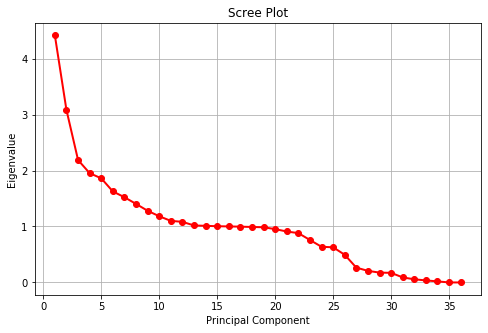

In [45]:
## (9) scree plot
num_vars= len(features)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(); plt.show()


In [46]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.22682721e-01, 8.56085694e-02, 6.07929163e-02, 5.42454252e-02,
       5.17078095e-02, 4.51937478e-02, 4.23071001e-02, 3.89955080e-02,
       3.55881145e-02, 3.28653922e-02, 3.05715079e-02, 3.00942199e-02,
       2.82851052e-02, 2.81158179e-02, 2.79126359e-02, 2.78178299e-02,
       2.76923473e-02, 2.75403213e-02, 2.74004776e-02, 2.64769065e-02,
       2.52968118e-02, 2.44866754e-02, 2.10767812e-02, 1.77052922e-02,
       1.74535306e-02, 1.37291718e-02, 7.34921856e-03, 5.75417099e-03,
       4.88485524e-03, 4.76813362e-03, 2.49776742e-03, 1.56620112e-03,
       1.00611162e-03, 5.30804966e-04, 2.41949006e-32, 8.82460318e-34])

<h3>Save all PCA and LDA Results to excel file<h3>

In [47]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_Loadings_dataset3.xlsx', engine='xlsxwriter')

pca_eigenVal_var.to_excel(writer, sheet_name='pca_eigenVal_var')
Loadings.to_excel(writer, sheet_name='Loadings')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [48]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_EigenVectors_dataset3.xlsx', engine='xlsxwriter')

EigenVectors.to_excel(writer, sheet_name='EigenVectors')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [49]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_Data_dataset3.xlsx', engine='xlsxwriter')

X_train_PCA.to_excel(writer, sheet_name='PCA Data', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()